<a href="https://colab.research.google.com/github/abhishek7467/Data_Science_notebooks/blob/main/my_obj_remove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transparent_background


  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.6/535.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6e58c2506235bb80763ccf691c0e080a4cd029023063e5f7ba094870fd050473
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: albucore
    Found existing insta

In [2]:
import os
import gdown

output_dir = "E:\Image_Segmentation\sam-hq\ckpt"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "latest.pth")

file_id = "13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY"
download_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(download_url, output_path, quiet=False)

print(f"File downloaded to: {output_path}")


Downloading...
From (original): https://drive.google.com/uc?id=13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY
From (redirected): https://drive.google.com/uc?id=13oBl5MTVcWER3YU4fSxW3ATlVfueFQPY&confirm=t&uuid=e60ed7b1-a892-460a-b312-6d44fe382527
To: /content/E:\Image_Segmentation\sam-hq\ckpt/latest.pth
100%|██████████| 368M/368M [00:03<00:00, 117MB/s]

File downloaded to: E:\Image_Segmentation\sam-hq\ckpt/latest.pth


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transparent_background import Remover


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [4]:
# Load model
remover = Remover() # default setting
remover = Remover(mode='fast', jit=True, device='cuda:0', ckpt="/content/E:\Image_Segmentation\sam-hq\ckpt/latest.pth") # custom setting
remover = Remover(mode='base-nightly') # nightly release checkpoin


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/transparent_background/Remover.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted b

Settings -> Mode=base, Device=cuda:0, Torchscript=disabled


/usr/local/lib/python3.10/dist-packages/transparent_background/backbones/SwinTransformer.py:428: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if W % self.patch_size[1] != 0:
/usr/local/lib/python3.10/dist-packages/transparent_background/backbones/SwinTransformer.py:430: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if H % self.patch_size[0] != 0:
/usr/local/lib/python3.10/dist-packages/transparent_background/backbones/SwinTransformer.py:366: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record t

Settings -> Mode=fast, Device=cuda:0, Torchscript=enabled
Settings -> Mode=base-nightly, Device=cuda:0, Torchscript=disabled


<!-- out = remover.process(img, type='rgba') # same as above
out = remover.process(img, type='map') # object map only
out = remover.process(img, type='green') # image matting - green screen
out = remover.process(img, type='white') # change backround with white color
out = remover.process(img, type=[255, 0, 0]) # change background with color code [255, 0, 0]
out = remover.process(img, type='blur') # blur background
out = remover.process(img, type='overlay') # overlay object map onto the image
out = remover.process(img, type='samples/background.jpg') # use another image as a background -->

In [6]:
img = Image.open("/content/image_20241211_192643.jpg").convert('RGB') # read image


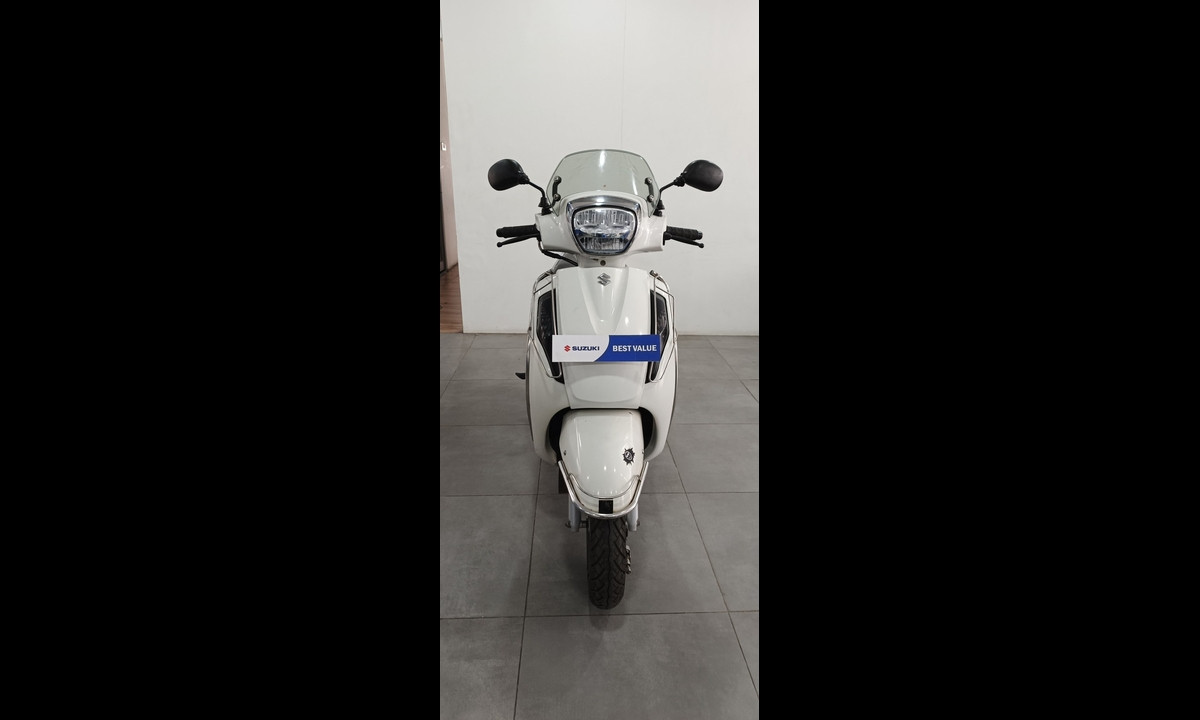

In [7]:
img


In [8]:
out = remover.process(img, type='rgba')
# out = remover.process(img, type='rgba') # same as above
# out = remover.process(img, type='map') # object map only
# out = remover.process(img, type='green') # image matting - green screen
# out = remover.process(img, type='white') # change backround with white color
# out = remover.process(img, type=[255, 0, 0]) # change background with color code [255, 0, 0]
# out = remover.process(img, type='blur') # blur background
# out = remover.process(img, type='overlay') # overlay object map onto the image
# # out = remover.process(img, type='samples/background.jpg') # use another image as a background

# cv2.cvtColor(np.array(out), cv2.COLOR_BGR2RGB)


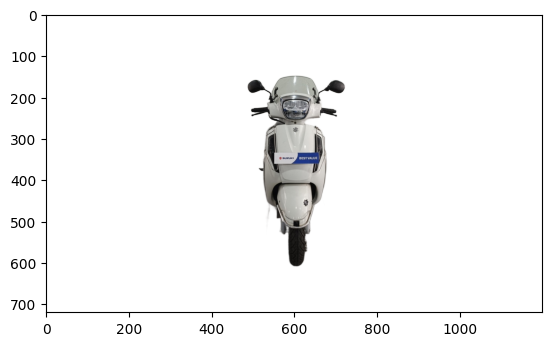

In [9]:
plt.imshow(out)
